Impport the packages

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stt
import matplotlib.pyplot as plt
import random
import pickle

# Numerical analysis on different values of m

In [2]:
np.random.seed(42)

curves_1phase =[] # List for storing the data in the case of only distributed voting
curves_2phase =[] # List for storing the data in the case of distributed + full voting

for full_vote_phase in [False, True]: # analyze the two cases (with and without full voting)
    for m in [0, 0.5, 1.]: # different values of m
        
        Np = 10**5 # number of people
        Nrep = 100 # number of repetition of the same configuration
        
        nv_vec = np.logspace(0, 2, 10) # Number of votes
        
        results = []
        corr = []
        for rep in range(0,Nrep): # for each repetition
            line = []
            true_values = np.random.normal(0,1,Np) # these are the true values of utility of each design
        
            max_ = np.max(true_values)
        
            
            for i, nv in enumerate(nv_vec):
                #print(stt.pearsonr(perturbed,true_values))
                perturbed = true_values + m * np.random.normal(0,max_/np.sqrt(nv),Np) # values perturbed by individual variations
                perturbed2 = true_values + m * np.random.normal(0,max_/np.sqrt(nv),Np)
        
                if i==0:
                    corr.append(stt.pearsonr(perturbed, perturbed2)[0]) # this can be used to calculate the correlation between responses
                
                perturbed = (perturbed*10*nv/max_).astype(int) # consider limitation on voting choices
        
                if full_vote_phase:
                    # Get indices of top 10 largest values in 'perturbed'
                    top_10_indices = np.argsort(perturbed)[-10:][::-1]  # sorted in descending order
                    
                    # Get corresponding values from 'true_values'
                    corresponding_values = true_values[top_10_indices] # the real utility of the selected ones
        
                    corresponding_value = np.max(corresponding_values) # the real utility of the  one selected
        
                
                else:        
                    max_index = np.argmax(perturbed) 
                    corresponding_value = true_values[max_index] # the real utility of the one selected
        
                line.append(corresponding_value/max_)
        
            line = np.array(line)
            results.append(line)
        
        if full_vote_phase:
            curves_2phase.append((results, np.mean(corr), m)) 
        else:
            curves_1phase.append((results, np.mean(corr), m))

Plot the results

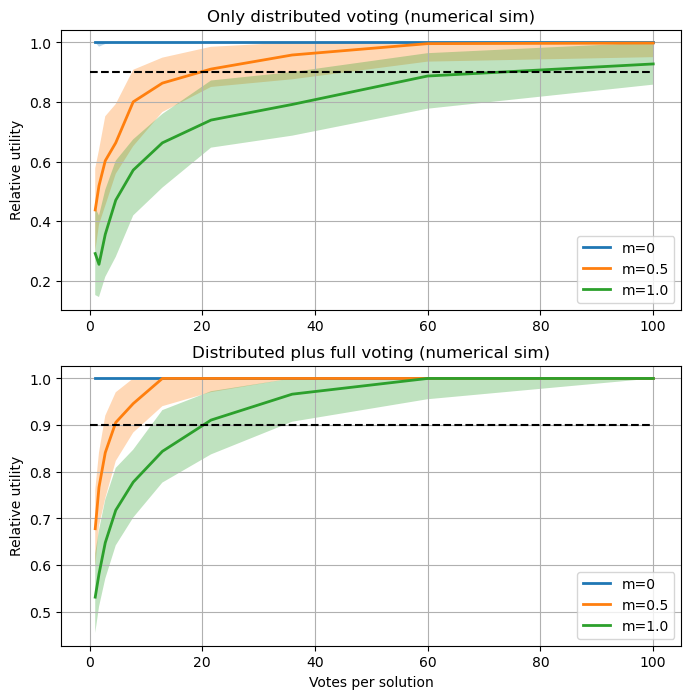

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))  # 2 rows, 1 column

for jj, curves in enumerate([curves_1phase, curves_2phase]):
    
    for results, mean_, m in curves:
        
        y_values = np.vstack(results)
        
        # Compute median and interquartile range
        median_y = np.median(y_values, axis=0)
        q1 = np.percentile(y_values, 25, axis=0)
        q3 = np.percentile(y_values, 75, axis=0)
        x = nv_vec
        
        axs[jj].plot(x, median_y, label="m="+str(m), linewidth=2)
        axs[jj].fill_between(x, q1, q3, alpha=0.3)

    if jj==0:
        axs[jj].set_title("Only distributed voting (numerical sim)")
    else:
        axs[jj].set_title("Distributed plus full voting (numerical sim)")
        axs[jj].set_xlabel('Votes per solution')
    
    axs[jj].set_ylabel('Relative utility')
    axs[jj].legend()
    axs[jj].plot([0, max(x)], [0.9, 0.9], '--k')
    axs[jj].grid(True)
plt.show()

# Make figure 1

Import the violin plot

In [4]:
with open('voting_methods_.pkl', 'rb') as f:
    data = pickle.load(f)

# Now you can access the contents
linear_voting = data['res'][0]
log_voting = data['res'][1]
quad_voting = data['res'][2]
ranking_voting = data['res'][3]

Make the merged figure

(0.5, 4.5)

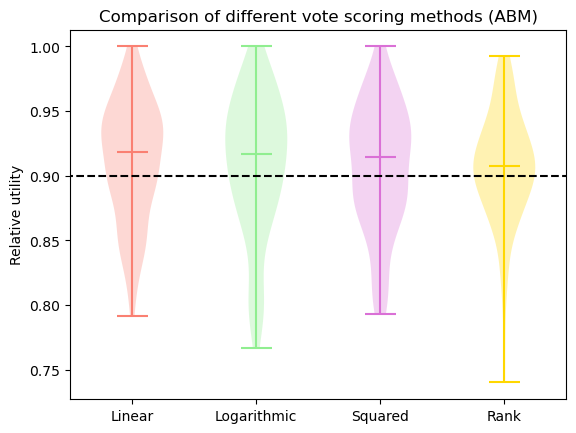

In [5]:
vp = plt.violinplot([linear_voting, log_voting, quad_voting, ranking_voting], showmeans=False, showmedians=True)

colors = ['salmon', 'lightgreen', 'orchid', 'gold']

# Color each violin
for i, body in enumerate(vp['bodies']):
    body.set_facecolor(colors[i])

# Color the lines: cbars, cmeans, cmedians
for i, color in enumerate(colors):
    if 'cbars' in vp:
        vp['cbars'].get_segments()[i]
        vp['cbars'].set_color(colors)
    if 'cmeans' in vp:
        vp['cmeans'].get_segments()[i]
        vp['cmeans'].set_color(colors)
    if 'cmedians' in vp:
        vp['cmedians'].get_segments()[i]
        vp['cmedians'].set_color(colors)
    if 'cmins' in vp:
        vp['cmins'].get_segments()[i]
        vp['cmins'].set_color(colors)
    if 'cmaxes' in vp:
        vp['cmaxes'].get_segments()[i]
        vp['cmaxes'].set_color(colors)

plt.xticks([1,2,3,4], ["Linear", "Logarithmic", "Squared", 'Rank'])  # Custom x-tick labels
plt.ylabel('Relative utility')
plt.title('Comparison of different vote scoring methods (ABM)')

plt.plot([-0.5,5],[0.9, 0.9],'k--')
plt.xlim([0.5,4.5])

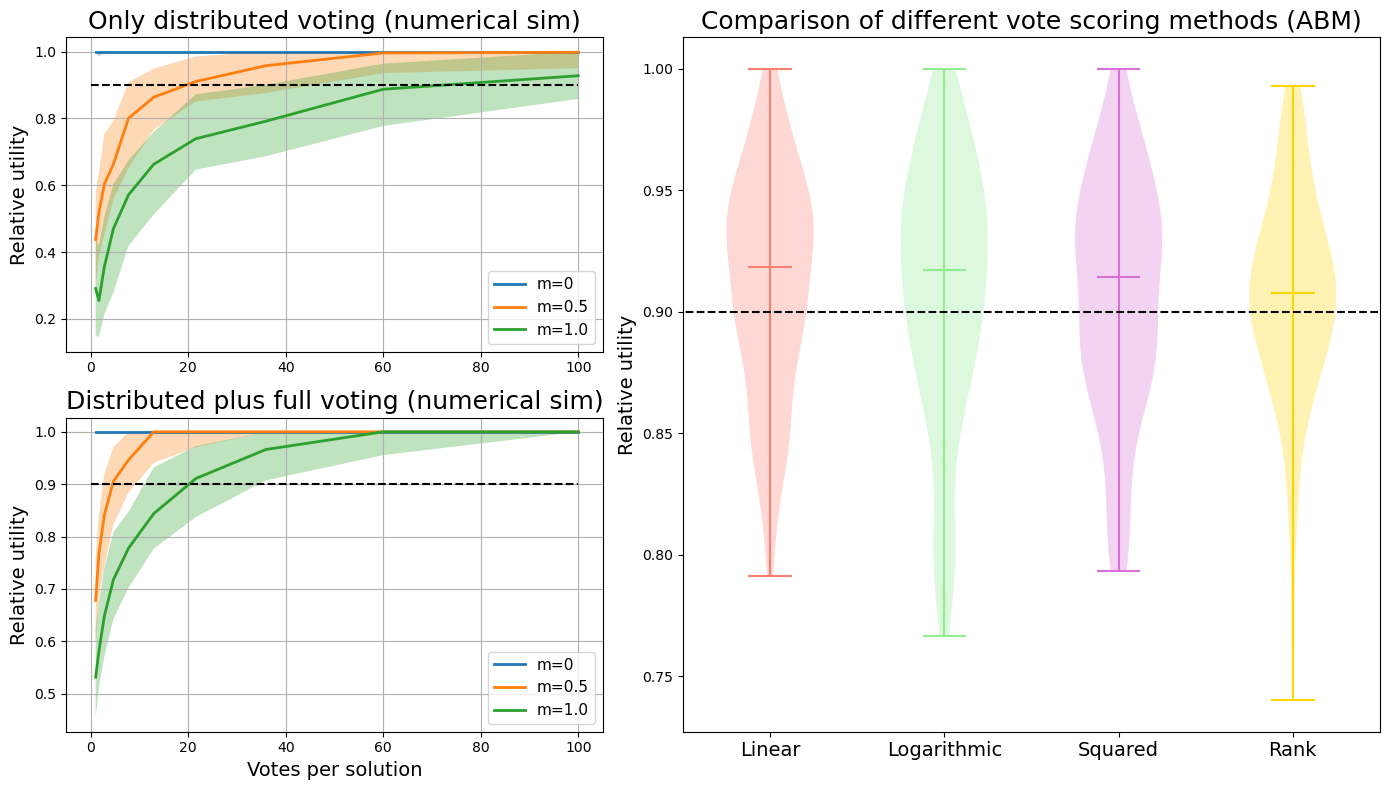

In [6]:
import matplotlib.gridspec as gridspec

fontsize1 = 18
fontsize2 = 14


# Start unified figure
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1.3])  # 2 rows x 2 columns layout

# === Left column: first figure's two subplots ===
axs_left_top = fig.add_subplot(gs[0, 0])
axs_left_bottom = fig.add_subplot(gs[1, 0])
axs = [axs_left_top, axs_left_bottom]

for jj, curves in enumerate([curves_1phase, curves_2phase]):
    for results, mean_, m in curves:
        y_values = np.vstack(results)
        median_y = np.median(y_values, axis=0)
        q1 = np.percentile(y_values, 25, axis=0)
        q3 = np.percentile(y_values, 75, axis=0)
        x = nv_vec

        axs[jj].plot(x, median_y, label="m="+str(m), linewidth=2)
        axs[jj].fill_between(x, q1, q3, alpha=0.3)

    if jj == 0:
        axs[jj].set_title("Only distributed voting (numerical sim)", fontsize=fontsize1)
    else:
        axs[jj].set_title("Distributed plus full voting (numerical sim)", fontsize=fontsize1)
        axs[jj].set_xlabel('Votes per solution', fontsize=fontsize2)

    axs[jj].set_ylabel('Relative utility', fontsize=fontsize2)
    axs[jj].legend(fontsize=11)
    axs[jj].plot([0, max(x)], [0.9, 0.9], '--k')
    axs[jj].grid(True)

# === Right column: second figure's violin plot ===
ax_right = fig.add_subplot(gs[:, 1])  # Span both rows
vp = ax_right.violinplot([linear_voting, log_voting, quad_voting, ranking_voting],
                         showmeans=False, showmedians=True)

colors = ['salmon', 'lightgreen', 'orchid', 'gold']

# Color violins
for i, body in enumerate(vp['bodies']):
    body.set_facecolor(colors[i])

# Color median and whisker lines
for key in ['cbars', 'cmedians', 'cmins', 'cmaxes']:
    if key in vp:
        vp[key].set_color(colors)

ax_right.set_xticks([1, 2, 3, 4])
ax_right.set_xticklabels(["Linear", "Logarithmic", "Squared", 'Rank'], fontsize=fontsize2)
ax_right.set_ylabel('Relative utility', fontsize=fontsize2)
ax_right.set_title('Comparison of different vote scoring methods (ABM)', fontsize=fontsize1)
ax_right.plot([-0.5, 5], [0.9, 0.9], 'k--')
ax_right.set_xlim([0.5, 4.5])

# === Final layout adjustments ===
plt.tight_layout()
plt.show()


# Plot the analytical models

In [7]:
from scipy.stats import norm

def expected_max_approx(n, sigma):
    # Extreme value theory approximation for E[max of n N(0, sigma^2)]
    if n <= 1:
        return 0.0
    gamma = 0.5772156649  # Euler-Mascheroni constant
    return sigma * (np.sqrt(2 * np.log(n)) - (np.log(np.pi) + np.log(np.log(n))) / (2 * np.sqrt(2 * np.log(n))))

def simulate_expected_max(n, sigma, n_trials=100000):
    # Monte Carlo simulation to estimate expected maximum
    samples = np.random.normal(loc=0, scale=sigma, size=(n_trials, n))
    max_values = np.max(samples, axis=1)
    return np.mean(max_values)

# Simulate the different cases
expert = []
remix = []
discuss = []

xx = np.arange(0,1.01, 0.01)
x = np.round((10**6)**xx)

for n in x:
    sigma = 1.0
    
    expert.append(expected_max_approx(n, sigma))
    remix.append(sigma*np.log(n)*0.9)
    discuss.append(1/n)
    #simulated = simulate_expected_max(n, sigma)


Text(0, 0.5, 'Utility')

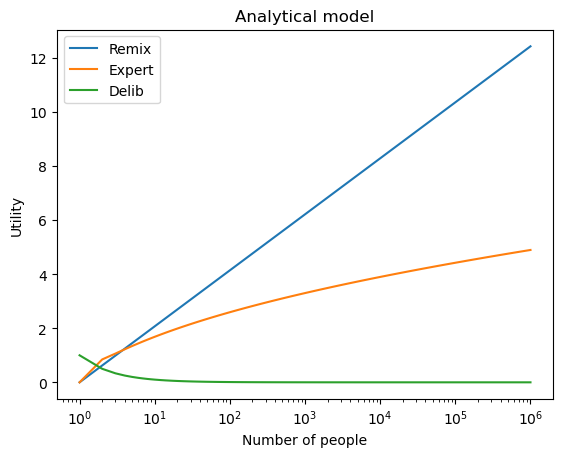

In [8]:
plt.plot(x, remix, label="Remix")
plt.plot(x, expert, label="Expert")
plt.plot(x, discuss, label="Delib")
plt.legend()
plt.semilogx()
plt.title("Analytical model")
plt.xlabel("Number of people")
plt.ylabel("Utility")

Save data for joint figure

In [9]:
data = {"x":x, "remix":remix, "expert":expert, "discuss":discuss}

with open('analytical_model.pkl', 'wb') as f:
    pickle.dump(data, f)

# Numerical simulations

In [10]:
def f_remixing(N, n, fun): # N = Number of people, n = solutions per person, fun= the function used to perturb the utility
    platform = [0]
    for i in range(0,n*N):
        val = random.choice(platform) + fun()
        platform.append(val)
    return np.max(platform)*0.9 # explicitly add the -10% penalization


def f_expert(N, fun): # N = Number of people, fun= the function used to perturb the utility
    series = []
    for i in range(0,N):
        series.append(fun())
    return np.max(series)

def f_deliberation(h, N, fun): # N = Number of people, h = the time people are willing to spend on finding new solutions, fun= the function used to perturb the utility

    result = 0
    
    reminder = h-N
    while reminder >0:
        ff = fun()
        if ff>0:
            result = result + ff
        reminder = reminder - N

    if reminder != 0:
        result += fun()/np.abs(reminder)

    return result

In [11]:
N_rep = 10 # number of repetitions for each configuration

# generate a log space
xx = np.arange(0,1.05, 0.05)
x = np.round((10**4)**xx)

# Different distributions used to perturb the utility
names = [
    "Uniform",
    "Normal",
    "Exponential", 
    "Chisquare",
    "Gamma",
    "Beta",
    "Laplace",
    "Weibull",
    "Binomial"
]

for name in names:
    
    if name == "Uniform":
        fun = lambda  : np.random.rand()
    
    elif name == "Normal":
        fun = lambda  : np.random.normal(0,1)
    
    elif name == "Exponential":
        fun = lambda  : np.random.exponential()
    
    elif name == "Gamma":
        fun = lambda  : np.random.gamma(1, 1)
        
    elif name == "Beta":
        fun = lambda  : np.random.beta(1, 2)
        
    elif name == "Chisquare":
        fun = lambda  : np.random.chisquare(2)
        
    
    elif name == "Laplace":
        fun = lambda  : np.random.laplace(0, 1)
        
    elif name == "Weibull":
        fun = lambda  : np.random.weibull(1)
        
    elif name == "Binomial":
        fun = lambda  : np.random.binomial(10, 0.5)
    
    
    
    n=1
    h=10
    
    # Lists for storing the results
    remixing_raw = []
    expert_raw = []
    deliberation_raw = []
    
    remixing_results = []
    expert_results = []
    deliberation_results = []
    
    remixing_std = []
    expert_std = []
    deliberation_std = []
    
    # Generate data
    for N in x.astype(int):
        remixing_vals = [f_remixing(N, n, fun) for _ in range(N_rep)]
        expert_vals = [f_expert(N, fun) for _ in range(N_rep)]
        deliberation_vals = [f_deliberation(h, N, fun) for _ in range(N_rep)]
        print(N)

        # Append the results
        remixing_raw.append(remixing_vals)
        expert_raw.append(expert_vals)
        deliberation_raw.append(deliberation_vals)
    
        remixing_results.append(np.mean(remixing_vals))
        expert_results.append(np.mean(expert_vals))
        deliberation_results.append(np.mean(deliberation_vals))
    
        remixing_std.append(np.std(remixing_vals))
        expert_std.append(np.std(expert_vals))
        deliberation_std.append(np.std(deliberation_vals))

    # save the data for the joint figure
    data = {"x":x,
        'remixing_raw': remixing_raw,
        'expert_raw': expert_raw,
        'deliberation_raw': deliberation_raw,
        
        'remixing_results': remixing_results,
        'expert_results': expert_results,
        'deliberation_results': deliberation_results,
        
        'remixing_std': remixing_std,
        'expert_std': expert_std,
        'deliberation_std': deliberation_std
    }
    
    
    with open('sim_'+name+'.pkl', 'wb') as f:
        pickle.dump(data, f)

1
2
3
4
6
10
16
25
40
63
100
158
251
398
631
1000
1585
2512
3981
6310
10000
1
2
3
4
6
10
16
25
40
63
100
158
251
398
631
1000
1585
2512
3981
6310
10000
1
2
3
4
6
10
16
25
40
63
100
158
251
398
631
1000
1585
2512
3981
6310
10000
1
2
3
4
6
10
16
25
40
63
100
158
251
398
631
1000
1585
2512
3981
6310
10000
1
2
3
4
6
10
16
25
40
63
100
158
251
398
631
1000
1585
2512
3981
6310
10000
1
2
3
4
6
10
16
25
40
63
100
158
251
398
631
1000
1585
2512
3981
6310
10000
1
2
3
4
6
10
16
25
40
63
100
158
251
398
631
1000
1585
2512
3981
6310
10000
1
2
3
4
6
10
16
25
40
63
100
158
251
398
631
1000
1585
2512
3981
6310
10000
1
2
3
4
6
10
16
25
40
63
100
158
251
398
631
1000
1585
2512
3981
6310
10000


Example: plot one case

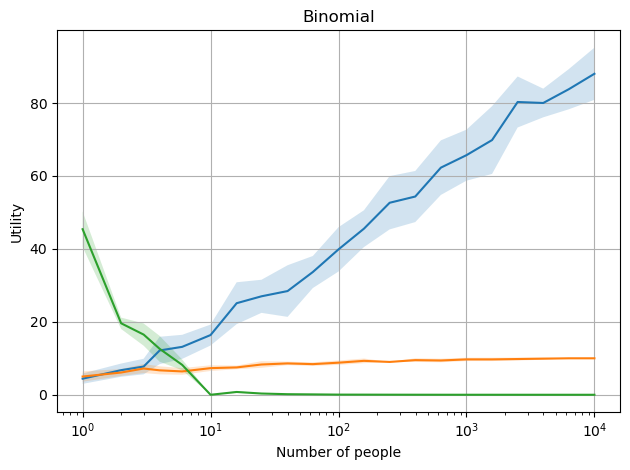

In [12]:
# f_remixing
plt.plot(x, remixing_results, label='Remixing')
plt.fill_between(x, np.array(remixing_results) - remixing_std, np.array(remixing_results) + remixing_std, alpha=0.2)

# f_expert
plt.plot(x, expert_results, label='Expert')
plt.fill_between(x, np.array(expert_results) - expert_std, np.array(expert_results) + expert_std, alpha=0.2)

# f_deliberation
plt.plot(x, deliberation_results, label='Deliberation')
plt.fill_between(x, np.array(deliberation_results) - deliberation_std, np.array(deliberation_results) + deliberation_std, alpha=0.2)

plt.xscale('log')
plt.xlabel('Number of people')
plt.ylabel('Utility')
plt.title(name)
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()